In [19]:
import os
import sys
import matplotlib.pyplot as plt
from scipy.stats import gmean

module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)

import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

import numpy as np, scipy.stats as st
import statsmodels.stats.api as sms

print(pd.__version__)

import latexgenerator

sns.set()
np.random.seed(12345678)

1.0.3


In [20]:
latexgen = latexgenerator.LatexExporter()

In [21]:
df_req_only = pd.read_csv("input/performance-consolidated-require-only.txt", delimiter=";", names=["name", "nodejs_version", "executionTime"], index_col=None) 
df_req_memb = pd.read_csv("input/performance-consolidated-require-memberexpr.txt", delimiter=";", names=["name", "nodejs_version", "executionTime"], index_col=None)
df_perf_reports = pd.read_csv("input/performance-consolidated-require-rewrite-report.txt", delimiter=";", names=["name", "req_checks", "prop_access_checks"], index_col=None)

In [22]:
nv_df_req_only = df_req_only.groupby(['name', 'nodejs_version']).median().unstack()

nv_df_req_only.columns=nv_df_req_only.columns.droplevel(0)
nv_df_req_only.index.name='packageName'
nv_df_req_only=nv_df_req_only.reset_index()
nv_df_req_only.columns.name='index'
nv_df_req_only.head()


index,packageName,original,permsys
0,d3-dsv-1.0.10,5166.5,5157.0
1,docco-0.7.0,5136.5,5132.5
2,dot-object-1.7.0,5167.0,5161.0
3,dox-0.9.0,5215.5,5213.5
4,findup-0.1.5,5151.5,5147.5


In [23]:
nv_df_req_memb = df_req_memb.groupby(['name', 'nodejs_version']).median().unstack()

nv_df_req_memb.columns=nv_df_req_memb.columns.droplevel(0)
nv_df_req_memb.index.name='packageName'
nv_df_req_memb=nv_df_req_memb.reset_index()
nv_df_req_memb.columns.name='index'
nv_df_req_memb.head()


index,packageName,original,permsys
0,d3-dsv-1.0.10,5268.0,5250.0
1,docco-0.7.0,5148.5,5146.5
2,dot-object-1.7.0,5339.5,5327.5
3,dox-0.9.0,5408.5,5407.0
4,findup-0.1.5,5227.5,5223.5


In [24]:
list=[]
for r in nv_df_req_only.values:
    r = np.append(r, r[1]/r[2])
    r = np.append(r, r[2]/r[1])
    list.append(r)
df_req_only = pd.DataFrame(list, columns=['packageName', 'original', 'permsys', 'perc1', 'perc2'])
df_req_only

,packageName,original,permsys,perc1,perc2
0,d3-dsv-1.0.10,5166.5,5157.0,1.001842,0.998161
1,docco-0.7.0,5136.5,5132.5,1.000779,0.999221
2,dot-object-1.7.0,5167.0,5161.0,1.001163,0.998839
3,dox-0.9.0,5215.5,5213.5,1.000384,0.999617
4,findup-0.1.5,5151.5,5147.5,1.000777,0.999224
5,html-minifier-3.5.19,5328.5,5332.5,0.999250,1.000751
6,js-cfb-1.1.0,5200.0,5196.0,1.000770,0.999231
7,js-xss-1.0.3,5155.0,5158.5,0.999322,1.000679
8,js-yaml-front-matter-4.0.0,5140.5,5138.5,1.000389,0.999611
9,json-refs-3.0.0,5322.0,5321.0,1.000188,0.999812


In [25]:
list=[]
for r in nv_df_req_memb.values:
    r = np.append(r, r[1]/r[2])
    r = np.append(r, r[2]/r[1])
    list.append(r)
df_req_memb = pd.DataFrame(list, columns=['packageName', 'original', 'permsys', 'perc1', 'perc2'])    
df_req_memb

,packageName,original,permsys,perc1,perc2
0,d3-dsv-1.0.10,5268.0,5250.0,1.003429,0.996583
1,docco-0.7.0,5148.5,5146.5,1.000389,0.999612
2,dot-object-1.7.0,5339.5,5327.5,1.002252,0.997753
3,dox-0.9.0,5408.5,5407.0,1.000277,0.999723
4,findup-0.1.5,5227.5,5223.5,1.000766,0.999235
5,html-minifier-3.5.19,5700.5,5698.5,1.000351,0.999649
6,js-cfb-1.1.0,5300.0,5300.0,1.000000,1.000000
7,js-xss-1.0.3,5261.5,5247.5,1.002668,0.997339
8,js-yaml-front-matter-4.0.0,5200.0,5200.0,1.000000,1.000000
9,json-refs-3.0.0,5894.5,5893.0,1.000255,0.999746


In [26]:
stats.shapiro(df_req_only.original)


(0.4399222731590271, 9.508161014082361e-08)

In [27]:
stats.shapiro(df_req_memb.original)

(0.5300813913345337, 6.019843681315251e-07)

In [28]:
stats.ttest_ind(df_req_only.original, df_req_only.permsys, equal_var=False)

Ttest_indResult(statistic=0.007096434730425303, pvalue=0.9943750375371476)

In [29]:
stats.ttest_ind(df_req_memb.original, df_req_memb.permsys, equal_var=False)

Ttest_indResult(statistic=0.021828675181809705, pvalue=0.9826988527079115)

In [61]:
stats.ttest_1samp(df_req_memb.original-df_req_memb.permsys, 1)
# print(df_req_memb.original/df_req_memb.permsys)
# print(gmean(df_req_memb.original/df_req_memb.permsys))
# print(df_req_memb.original, df_req_memb.permsys, df_req_memb.original / df_req_memb.permsys)


Ttest_1sampResult(statistic=2.2811119374514015, pvalue=0.03425112117829953)

In [31]:
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")
    return { 't': t, 'pvalue': p, 'dof' : dof }


In [32]:
df_req_only_ttest = welch_ttest(df_req_only.original, df_req_only.permsys)
df_req_only_ttest['t']


 Welch's t-test= 0.0071 
 p-value = 0.9944 
 Welch-Satterthwaite Degrees of Freedom= 37.9996


0.007096434730425303

In [50]:
df_req_memb_ttest = welch_ttest(df_req_memb.original, df_req_memb.permsys)
df_req_memb_ttest['t']


 Welch's t-test= 0.0218 
 p-value = 0.9827 
 Welch-Satterthwaite Degrees of Freedom= 37.9964


0.021828675181809705

In [51]:
print(1 - gmean(df_req_memb.perc2))


0.002100607036533475


In [35]:
latexgen.__init__()
latexgen.add_command("performanceReqOnlyTtest", round(df_req_only_ttest['t'], 2))
latexgen.add_command("performanceReqOnlyPvalue", round(df_req_only_ttest['pvalue'], 2))
latexgen.add_command("performanceReqOnlyDOF", round(df_req_only_ttest['dof'], 2))
latexgen.add_command("performanceReqMembTtest", round(df_req_memb_ttest['t'], 2))
latexgen.add_command("performanceReqMembPvalue", round(df_req_memb_ttest['pvalue'], 2))
latexgen.add_command("performanceReqMembDOF", round(df_req_memb_ttest['dof'], 2))
latexgen.export_commands('result-generated.tex')

In [44]:
df = pd.DataFrame()
df['package_name'] = df_req_memb['packageName']
df['original_ms'] = df_req_memb['original']

# # permsys (require only)
# df['req_time_ms'] = df_req_only['permsys']
# list=[]
# for r in df.values:
#     r = np.append(r, round(1 - (r[2]/r[1]), 3))
#     list.append(r)
# df = pd.DataFrame(list, columns=['packageName', 'original', 'permsys1', 'overhead1'])

# permsys (require and prop. access)
df['req_propaccess_time_ms'] = df_req_memb['permsys']
list=[]
for r in df.values:
    r = np.append(r, round(1 - (r[2]/r[1]), 3))
    list.append(r)
df = pd.DataFrame(list, columns=['packageName', 'original', 'permsys', 'overhead'])
df


df['nr_req_checks'] = df_perf_reports['req_checks']
df['nr_propaccess_checks'] = df_perf_reports['prop_access_checks']
print(df.to_latex(index=False))

\begin{tabular}{lrrrrr}
\toprule
                packageName &  original &  permsys &  overhead &  nr\_req\_checks &  nr\_propaccess\_checks \\
\midrule
              d3-dsv-1.0.10 &    5268.0 &   5250.0 &     0.003 &             25 &                   408 \\
                docco-0.7.0 &    5148.5 &   5146.5 &     0.000 &             71 &                 65774 \\
           dot-object-1.7.0 &    5339.5 &   5327.5 &     0.002 &             40 &                     2 \\
                  dox-0.9.0 &    5408.5 &   5407.0 &     0.000 &           3478 &                    21 \\
               findup-0.1.5 &    5227.5 &   5223.5 &     0.001 &             12 &                     0 \\
       html-minifier-3.5.19 &    5700.5 &   5698.5 &     0.000 &             44 &                     3 \\
               js-cfb-1.1.0 &    5300.0 &   5300.0 &     0.000 &             10 &                     0 \\
               js-xss-1.0.3 &    5261.5 &   5247.5 &     0.003 &             11 &                 

In [45]:
df.head(12)

,packageName,original,permsys,overhead,nr_req_checks,nr_propaccess_checks
0,d3-dsv-1.0.10,5268.0,5250.0,0.003,25,408
1,docco-0.7.0,5148.5,5146.5,0.000,71,65774
2,dot-object-1.7.0,5339.5,5327.5,0.002,40,2
3,dox-0.9.0,5408.5,5407.0,0.000,3478,21
4,findup-0.1.5,5227.5,5223.5,0.001,12,0
5,html-minifier-3.5.19,5700.5,5698.5,0.000,44,3
6,js-cfb-1.1.0,5300.0,5300.0,0.000,10,0
7,js-xss-1.0.3,5261.5,5247.5,0.003,11,0
8,js-yaml-front-matter-4.0.0,5200.0,5200.0,0.000,7,7
9,json-refs-3.0.0,5894.5,5893.0,0.000,88,750


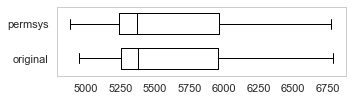

In [49]:
df.columns = columns=['packageName', 'original', 'permsys', 'overhead', 'nr\_req\_checks', 'nr\_propaccess\_checks']
df2 = df[['packageName', 'original', 'permsys',]]
sns.set_style("whitegrid")
sns.set_context("paper")
df2
color = {'boxes': 'black', 'whiskers': 'black', 'medians': 'black', 'caps': 'black'}
medianprops = dict(linestyle='-', linewidth=1, color='white')
boxprops = dict(linestyle='-', linewidth=1, color='white', facecolor='white')
fig = df2.plot(kind='box', grid=False, figsize=(5, 1.5), 
              showfliers=False, vert=False, fontsize=11, color=color, widths=.6).get_figure()


fig.patch.set_facecolor('white')
fig.tight_layout()
fig.savefig(fname='perf_boxplot.pdf')
